In [1]:
import sys
import os

# Adiciona o diretório pai ao caminho de pesquisa de módulos
sys.path.append(os.path.abspath(os.path.join('..')))

# Check if cuda is available

In [2]:
import torch
from tqdm import tqdm

In [3]:
torch.cuda.is_available()

True

# Check if CUBs200 dataset is OK

In [4]:
from torchvision import transforms

from avalanche.benchmarks.classic import SplitCUB200
from utils import create_plot_images

from avalanche.evaluation.metrics import ConfusionMatrix, WandBStreamConfusionMatrix
from avalanche.evaluation.metric_utils import default_cm_image_creator

In [5]:
train_transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ]
)

eval_transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ]
)

In [6]:
dataset_name = 'cub-200'
total_number_classes = 200
n_split_experiences = 5

# creating the benchmark (scenario object)
split_ds = SplitCUB200(
    n_experiences=n_split_experiences,
    seed=1234,
    train_transform=train_transform,
    eval_transform=eval_transform
    
)

train_stream = split_ds.train_stream
test_stream = split_ds.test_stream

train_ds = []
test_ds = []
masks = []
classes_in_experience = []

for experience in train_stream:
    print("Start of task ", experience.task_label, 'experience.current_experience', experience.current_experience)
    print('Classes in this task:', experience.classes_in_this_experience)
    masks.append([i for i in range(total_number_classes) if i not in experience.classes_in_this_experience])
    classes_in_experience.append(experience.classes_in_this_experience)
    
    # The current Pytorch training set can be easily recovered through the 
    # experience
    current_training_set = experience.dataset
    train_ds.append(current_training_set)
    
    # ...as well as the task_label
    print('Task {}'.format(experience.task_label))
    print('This task contains', len(current_training_set), 'training examples')

    # we can recover the corresponding test experience in the test stream
    current_test_set = test_stream[experience.current_experience].dataset
    print('This task contains', len(current_test_set), 'test examples')
    test_ds.append(current_test_set)
    print(80*'-')

# Getting a Sample from the first Task
batch_gen = torch.utils.data.DataLoader(train_ds[0], 
                              batch_size=9, 
                              shuffle=True, 
                              num_workers=1,
                              )
for batch in tqdm(batch_gen):
    sample = batch[0]
    target = batch[1]
    print(sample.shape)
    break

Files already downloaded and verified
Files already downloaded and verified
Start of task  0 experience.current_experience 0
Classes in this task: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Task 0
This task contains 3000 training examples
This task contains 2864 test examples
--------------------------------------------------------------------------------
Start of task  0 experience.current_experience 1
Classes in this task: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]
Task 0
This task contains 749 training examples
This task contains 714 test examples
------------

  0%|                                                                                                                                   | 0/334 [00:00<?, ?it/s]

torch.Size([9, 3, 128, 128])


72
86
34
54
21
48
69
2
18


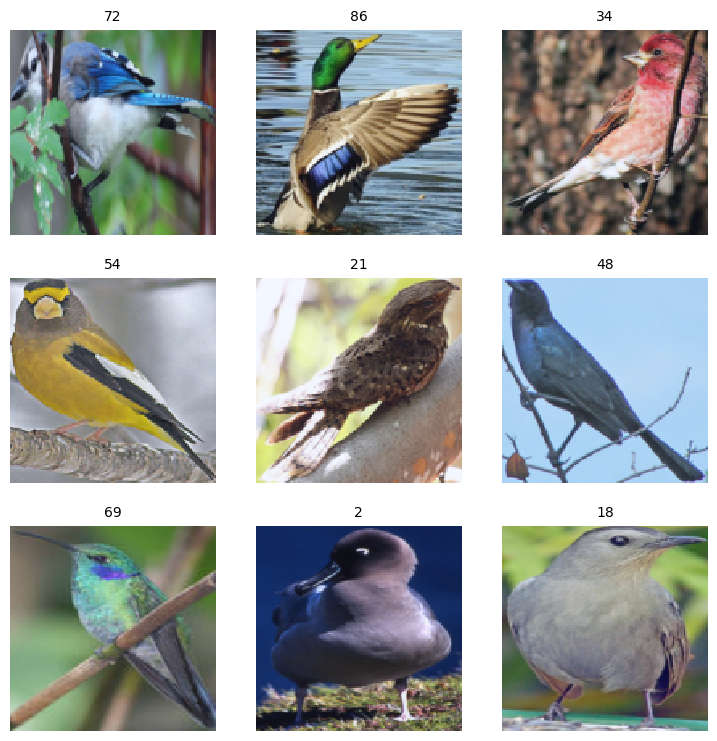

In [7]:
create_plot_images(sample_cpu=sample.numpy(), target=target.numpy())

# Check if CIFAR-100 dataset is OK

In [8]:
from torchvision import transforms

from avalanche.benchmarks.classic import SplitCIFAR100
from utils import create_plot_images

from avalanche.evaluation.metrics import ConfusionMatrix, WandBStreamConfusionMatrix
from avalanche.evaluation.metric_utils import default_cm_image_creator

In [9]:
dataset_name = 'cifar-100'
total_number_classes = 100
n_split_experiences = 10

# creating the benchmark (scenario object)
split_ds = SplitCIFAR100(
    n_experiences=n_split_experiences,
    seed=1234,
    return_task_id=True
)

train_stream = split_ds.train_stream
test_stream = split_ds.test_stream

train_ds = []
test_ds = []
masks = []
classes_in_experience = []

for experience in train_stream:
    print("Start of task ", experience.task_label, 'experience.current_experience', experience.current_experience)
    print('Classes in this task:', experience.classes_in_this_experience)
    masks.append([i for i in range(total_number_classes) if i not in experience.classes_in_this_experience])
    classes_in_experience.append(experience.classes_in_this_experience)
    
    # The current Pytorch training set can be easily recovered through the 
    # experience
    current_training_set = experience.dataset
    train_ds.append(current_training_set)
    
    # ...as well as the task_label
    print('Task {}'.format(experience.task_label))
    print('This task contains', len(current_training_set), 'training examples')

    # we can recover the corresponding test experience in the test stream
    current_test_set = test_stream[experience.current_experience].dataset
    print('This task contains', len(current_test_set), 'test examples')
    test_ds.append(current_test_set)
    print(80*'-')


# Getting a Sample from the first Task
batch_gen = torch.utils.data.DataLoader(train_ds[0], 
                              batch_size=9, 
                              shuffle=True, 
                              num_workers=1,
                              )

for batch in tqdm(batch_gen):
    sample = batch[0]
    target = batch[1]
    print(sample.shape)
    break

Files already downloaded and verified
Files already downloaded and verified
Start of task  0 experience.current_experience 0
Classes in this task: [1, 34, 67, 75, 46, 48, 18, 51, 19, 30]
Task 0
This task contains 5000 training examples
This task contains 1000 test examples
--------------------------------------------------------------------------------
Start of task  1 experience.current_experience 1
Classes in this task: [66, 69, 7, 39, 76, 13, 14, 16, 22, 92]
Task 1
This task contains 5000 training examples
This task contains 1000 test examples
--------------------------------------------------------------------------------
Start of task  2 experience.current_experience 2
Classes in this task: [64, 36, 6, 72, 11, 77, 78, 82, 56, 94]
Task 2
This task contains 5000 training examples
This task contains 1000 test examples
--------------------------------------------------------------------------------
Start of task  3 experience.current_experience 3
Classes in this task: [33, 5, 70, 8, 9

  0%|                                                                                                                                   | 0/556 [00:00<?, ?it/s]

torch.Size([9, 3, 32, 32])


19
30
34
1
18
1
67
1
19


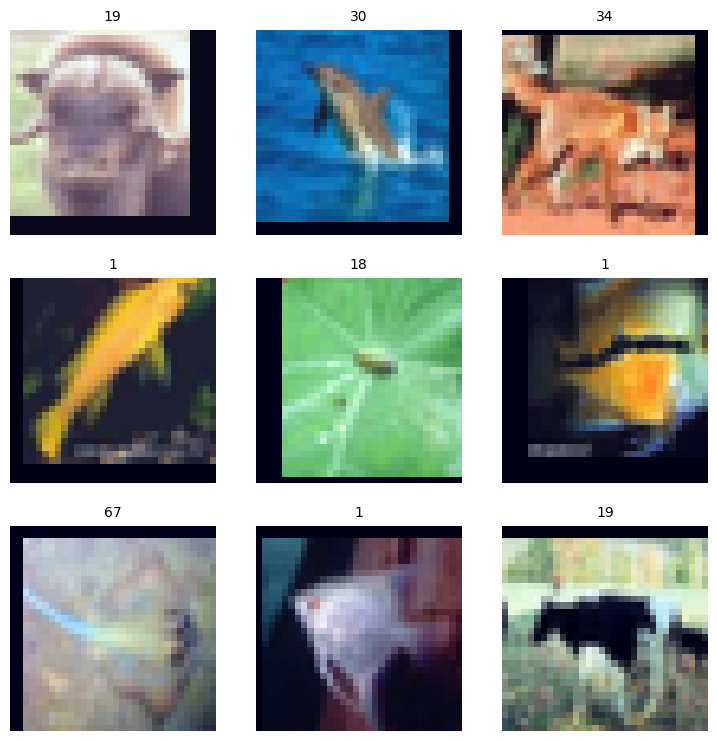

In [10]:
create_plot_images(sample_cpu=sample.numpy(), target=target.numpy())

# Check Models

In [11]:
import torchvision.models as models

In [12]:
model = models.vgg19_bn(weights="IMAGENET1K_V1")
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
masks